# Exercício 7

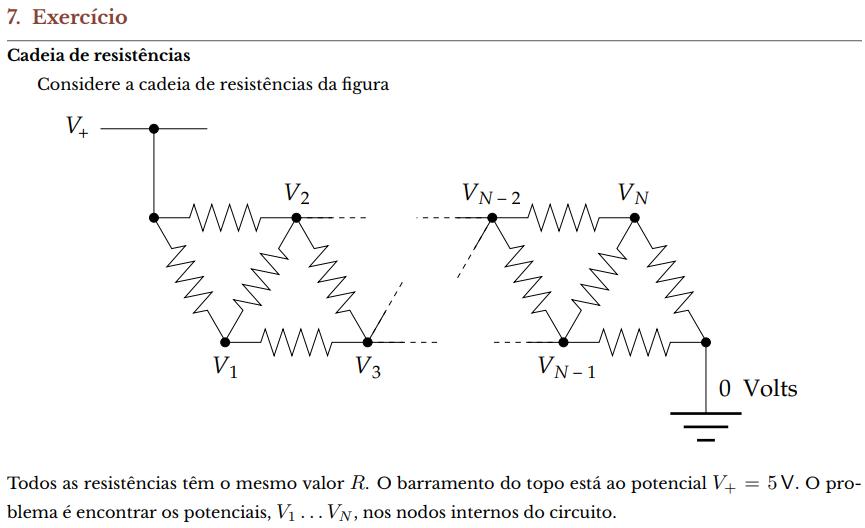
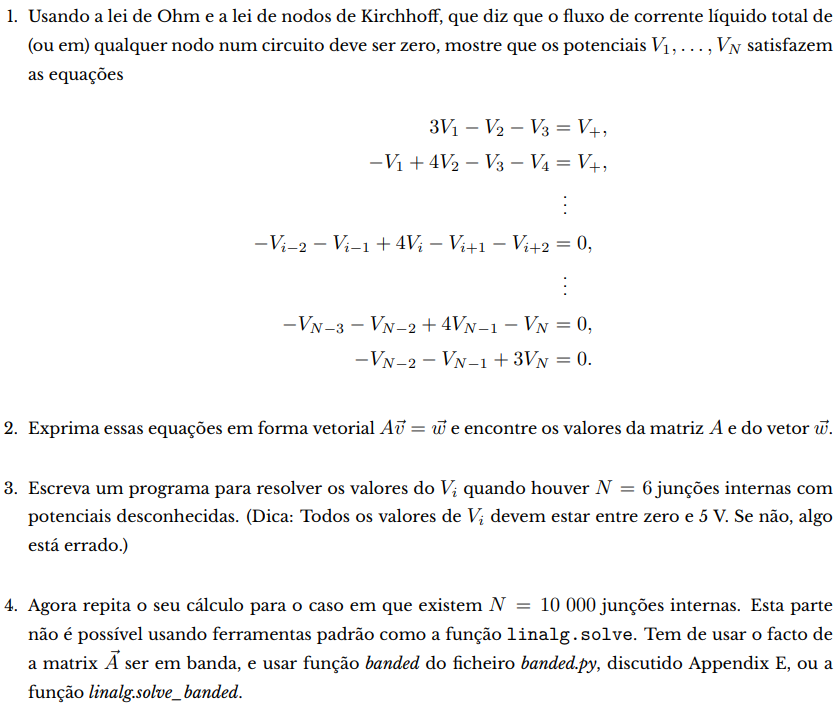

In [105]:
from typing import Callable
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Alínea 1

Usando a lei dos nodos, sendo $V_0 = V_+$:

$$
\begin{cases}
\left(\frac{V_0 - V_1}{R}\right) + \left(\frac{V_2 - V_1}{R}\right) + \left(\frac{V_3 - V_1}{R}\right) = 0
\\\\
\left(\frac{V_0 - V_2}{R}\right) + \left(\frac{V_1 - V_2}{R}\right) + \left(\frac{V_3 - V_2}{R}\right) + \left(\frac{V_4 - V_2}{R}\right) = 0
\\\\
\dots
\\\\
\left(\frac{V_{i-2} - V_i}{R}\right) + \left(\frac{V_{i-1} - V_i}{R}\right) + \left(\frac{V_{i+1} - V_i}{R}\right) + \left(\frac{V_{i+2} - V_i}{R}\right) = 0
\\\\
\dots
\\\\
\left(\frac{V_{N-3} - V_{N-1}}{R}\right) + \left(\frac{V_{N-2} - V_{N-1}}{R}\right) + \left(\frac{V_{N} - V_{N-1}}{R}\right) + \left(\frac{0 - V_{N-1}}{R}\right) = 0
\\\\
\left(\frac{V_{N-2} - V_N}{R}\right) + \left(\frac{V_{N-1} - V_N}{R}\right) + \left(\frac{0 - V_N}{R}\right) = 0
\end{cases}
$$

Este sistema é equivalente ao do enunciado!

## Alínea 2

Temos que:

$$
A = \begin{pmatrix}
3 & -1 & -1 & 0 & 0 & 0 & \dots & 0 & 0 & 0 & 0
\\
-1 & 4 & -1 & -1 & 0 & 0 & \dots & 0 & 0 & 0 & 0
\\
-1 & -1 & 4 & -1 & -1 & 0 & \dots & 0 & 0 & 0 & 0
\\
0 & -1 & -1 & 4 & -1 & -1 & \dots & 0 & 0 & 0 & 0
\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots & \vdots 
\\
0 & 0 & 0 & 0 & 0 & 0 & \cdots & -1 & -1 & 4 & -1
\\
0 & 0 & 0 & 0 & 0 & 0 & \cdots & 0 & -1 & -1 & 3
\end{pmatrix}
$$

E ainda:
$$
A = \begin{pmatrix}
V_+
\\
V_+
\\
0
\\
0
\\
\vdots
\\
0
\\
0
\end{pmatrix}
$$

## Alínea 3

In [106]:
def problema(N: int) -> tuple[np.ndarray, np.ndarray]:
    """
        Devolve a equação `A * xx = bb` característica do problema.

        ### Retorno
        Devolve um tuplo `(A, bb)`.
    """
    A = np.zeros((N, N))

    # Linhas diferentes
    A[0][:3] = [3, -1, -1]
    A[1][:4] = [-1, 4, -1, -1]
    A[N-2][N-4:] = [-1, -1, 4, -1]
    A[N-1][N-3:] = [-1, -1, 3]

    # Linhas habituais
    for i in range(2, N-2):
        A[i][i-2:i+3] = [-1, -1, 4, -1, -1]
    
    # Vetor b
    bb = np.zeros(N)
    bb[0:2] = [5, 5]

    return A, bb

A, bb = problema(6)
vv = np.linalg.solve(A, bb)
print(vv)


[3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ]


## Alínea 4

In [107]:
def bandify(A: np.ndarray, up: int, down: int) -> np.ndarray:
    """
        Dada uma matriz quadrada em banda `A` N por N com:
        - `down` subdiagonais não nulas abaixo da diagonal principal
        - `up` subdiagonais não nulas acima da diagonal principal
        
        ### Retorno
        Devolve uma matriz (up + down + 1) por N em que cada linha contém os elementos de uma diagonal ou subdiagonal, como descrito nas páginas 524-525 do Newman.
    """

    N = A.shape[0]
    B = np.zeros((up + down + 1, N))

    # Percorre as diagonais e guarda-as como linhas da nova matriz
    for diag in range(up, -down - 1, -1):
        start = max(0, -diag)
        end = min(N-diag, N)
        
        # Diagonais superiores, tem zeros no início
        # Diagonais inferiores, tem zeros no fim
        for i in range(start, end):
            B[up - diag, i + diag] = A[i][i + diag]
    
    return B


def unbandify(B: np.ndarray, up: int, down: int) -> np.ndarray:
    """
        Dada uma matriz B (up + down + 1) por N que já foi organizada como descrito nas páginas 524-525 do Newman, devolve a matriz quadrada correspondente.
        
        ### Retorno
        Uma matriz quadrada
    """

    N = B.shape[1]
    A = np.zeros((N, N))

    # Percorre as linhas de B e guarda-as nas diagonais de A
    for line in range(up + down + 1):
        start = max(0, up - line)
        end = min(N, N + up - line)

        diag = up - line
        for i in range(0, end-start):
            A[max(0, -diag) + i, max(0, diag) + i] = B[line, i+start]
    
    return A

In [108]:
T = np.array([
    [1, 2, 3, 0, 0, 0, 0, 0, 0],
    [4, 5, 6, 7, 0, 0, 0, 0, 0],
    [0, 8, 9, 10, 11, 0, 0, 0, 0],
    [0, 0, 12, 13, 14, 15, 0, 0, 0],
    [0, 0, 0, 16, 17, 18, 19, 0, 0],
    [0, 0, 0, 0, 20, 21, 22, 23, 0],
    [0, 0, 0, 0, 0, 24, 25, 26, 27],
    [0, 0, 0, 0, 0, 0, 28, 29, 30],
    [0, 0, 0, 0, 0, 0, 0, 31, 32],
])

print(T.shape)
print(T)
print("")

bT = bandify(T, 2, 1)
print(bT, "\n")
print(unbandify(bT, 2, 1), "\n")


(9, 9)
[[ 1  2  3  0  0  0  0  0  0]
 [ 4  5  6  7  0  0  0  0  0]
 [ 0  8  9 10 11  0  0  0  0]
 [ 0  0 12 13 14 15  0  0  0]
 [ 0  0  0 16 17 18 19  0  0]
 [ 0  0  0  0 20 21 22 23  0]
 [ 0  0  0  0  0 24 25 26 27]
 [ 0  0  0  0  0  0 28 29 30]
 [ 0  0  0  0  0  0  0 31 32]]

[[ 0.  0.  3.  7. 11. 15. 19. 23. 27.]
 [ 0.  2.  6. 10. 14. 18. 22. 26. 30.]
 [ 1.  5.  9. 13. 17. 21. 25. 29. 32.]
 [ 4.  8. 12. 16. 20. 24. 28. 31.  0.]] 

[[ 1.  2.  3.  0.  0.  0.  0.  0.  0.]
 [ 4.  5.  6.  7.  0.  0.  0.  0.  0.]
 [ 0.  8.  9. 10. 11.  0.  0.  0.  0.]
 [ 0.  0. 12. 13. 14. 15.  0.  0.  0.]
 [ 0.  0.  0. 16. 17. 18. 19.  0.  0.]
 [ 0.  0.  0.  0. 20. 21. 22. 23.  0.]
 [ 0.  0.  0.  0.  0. 24. 25. 26. 27.]
 [ 0.  0.  0.  0.  0.  0. 28. 29. 30.]
 [ 0.  0.  0.  0.  0.  0.  0. 31. 32.]] 



Podemos perceber que deste modo, as linhas do nosso problema original estão representadas nas diagonais que vão da esquerda para a direita e de baixo para cima! As colunas continuam a ser as colunas, estando antecedidas ou seguidas de zeros.

In [109]:
A, bb = problema(10_000)
B = bandify(A, 2, 2)
print(A)
print("")
print(B)

[[ 3. -1. -1. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [-1. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1. -1.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ... -1. -1.  3.]]

[[ 0.  0. -1. ... -1. -1. -1.]
 [ 0. -1. -1. ... -1. -1. -1.]
 [ 3.  4.  4. ...  4.  4.  3.]
 [-1. -1. -1. ... -1. -1.  0.]
 [-1. -1. -1. ... -1.  0.  0.]]


In [110]:
def problema_banded(N: int) -> tuple[np.ndarray, np.ndarray]:
    """
        Devolve a equação `A * xx = bb` característica do problema, sendo que A é uma matriz em banda da forma descrita nas páginas 524-525 do Newman.

        ### Retorno
        Devolve um tuplo `(A, bb)`.
    """

    A = np.zeros((5, N))

    # Colunas diferentes
    A[:, 0] = [0, 0, 3, -1, -1]
    A[:, 1] = [0, -1, 4, -1, -1]
    A[:, N-2] = [-1, -1, 4, -1, 0]
    A[:, N-1] = [-1, -1, 3, 0, 0]

    # Colunas iguais
    for col in range(2, N-2):
        A[:, col] = [-1, -1, 4, -1, -1]
    
    # Vetor b
    bb = np.zeros(N)
    bb[0:2] = [5, 5]

    return A, bb


A, bb = problema_banded(10_000)
vv = sp.linalg.solve_banded((2, 2), A, bb)
print(vv)

[4.99888228e+00 4.99861842e+00 4.99802841e+00 ... 1.97158611e-03
 1.38158071e-03 1.11772227e-03]


In [111]:
# TODO: COMPLETAR
def gaussbanded(Ao: np.ndarray, bbo: np.ndarray, up: int, down: int) -> np.ndarray:
    """
        Resolve o sistema de equações definido por A * xx = bb usando eliminação gaussiana sem pivotagem, sendo A uma matriz em banda na forma definida nas páginas 524-525 do Newman.
    """

    # Evitar side effects
    A = np.copy(Ao)
    bb = np.copy(bbo)

    N = bb.size

    # A matriz ainda não é triangular superior
    if down != 0:

        # Eliminação Gaussiana
        for i in range(N-1):

            # O pivô apenas anda para o lado na matriz A
            piv = A[up, i]

            # Percorrer as linhas da matriz A
            for j in range(1, down + 1):
                coef = A[up + j, i] / piv
                bb[j] -= bb[i] * coef
                
                # Percorrer as colunas da matriz A e atualizar a matriz de acordo com o algoritmo
                for k in range(min(up + down + 1, N + up - i)):
                    A[up + j + 1 - k, i + k] -= A[up - k, i + k] * coef
            
            print(A)

                

    # Substituição Regressiva
    A = unbandify(A)
    xx = np.zeros(N)
    xx[-1] = bb[-1] / A[N-1, N-1]
    for i in range(N-1, -1, -1):
        xx[i] = (bb[i] - (A[i][i+1:] @ xx[i+1:])) / A[i][i]
    
    return xx

In [112]:
vv = gaussbanded(A, bb, 2, 2)
print(vv)

IndexError: index 5 is out of bounds for axis 0 with size 5